# ECSE 415 - Final Project
Quentin Norris - 260621167

Connor Plante - 260708461

Sarah Usman - 260620360

Bogdan Dumitru- 260690446

Julien Courbebasse - 260614548

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import glob

## 4. Face Recognition

In [2]:
def populate_images(filepath):
    images = []

    files = sorted(glob.glob (filepath))

    for myFile in files:
        img = cv2.imread(myFile)
        img = cv2.resize(img,(256,256))
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        images.append(img)
    return images

def sift(dataset, interest_regions, labels):
    
    # Create the SIFT object used to calculate the SIFT keypoints
    sift_obj = cv2.xfeatures2d.SIFT_create()
    
    label_counter = -1
    ground_truth = []
    all_keypoints = []
    all_descriptors = []
    for i in range(len(interest_regions)):
        
        # Each image needs to manually be assigned a label as a ground truth manually
        # Seeing the image are ordered, we can do this process while iterating through the images
        if(i % (len(dataset) / len(labels)) == 0):
            label_counter += 1
        ground_truth.append(labels[label_counter])
        
        [x,y,w,h] = interest_regions[i]
    
        # create a mask image filled with zeros, the size of original image
        mask = np.zeros(dataset[i].shape[:2], dtype=np.uint8)

        # draw your selected ROI on the mask image
        cv2.rectangle(mask, (x,y), ((x+w),(y+h)), (255), thickness = -1)

        # provide mask to the detect method
        keypoints = sift_obj.detect(dataset[i],mask)
        
        all_keypoints.append(keypoints)

        if (i % (len(dataset)//10) == 0):
            copy_dataset = dataset[i].copy()
            img_display = cv2.drawKeypoints(dataset[i], keypoints, copy_dataset)
            print('Num keypoints: '+ str(len(keypoints)))
    #         plt.figure(figsize=(20,20))
            plt.imshow(img_display)
            plt.show()
    return all_keypoints, ground_truth


### 4.1 - Training: Face Recognition
There are a total of 75 training images (15 for each student). They are located in the "Train_Images" directory in the root folder of the project 

In [3]:
# Manually define the train images' region of interest (ROI) as rectangles
# Each rectangle is stored in a [x,y,w,h] format, where (x,y) are the coords of top left corner, and w and h are 
# the width and height respectively
# (in order of image name)
quentin_train_ROI = [[98, 70, 51, 51], [100, 71, 36, 43], [90, 75, 35, 50], [122, 73, 30, 48], [125, 75, 35, 50], [98, 60, 67, 75], [80, 62, 55, 73], [80, 55, 47, 78], [100, 75, 50, 68], [98, 62, 51, 90], [55, 70, 120, 133], [80, 72, 85, 125], [70, 90, 80, 120], [60, 67, 90, 127], [97, 54, 88, 156]]
connor_train_ROI = [[112, 94, 46, 46], [103, 98, 45, 45], [103, 103, 38, 47], [109, 96, 39, 49], [115, 104, 30, 47], [92, 80, 60, 65], [100, 77, 45, 67], [70, 83, 51, 67], [100, 80, 50, 70], [106, 81, 44, 69], [80, 60, 105, 122], [70, 63, 105, 125], [50, 80, 80, 120], [98, 75, 80, 118], [112, 59, 75, 131]]
bogdan_train_ROI = [[100, 105, 57, 57], [120, 111, 27, 42], [128, 106, 35, 44], [95, 102, 38, 46], [89, 105, 36, 50], [95, 96, 62, 62], [124, 104, 47, 65], [131, 99, 52, 67], [91, 87, 65, 80], [76, 91, 60, 75], [68, 72, 133, 140], [89, 80, 100, 125], [107, 78, 80, 130], [45, 84, 115, 120], [60, 89, 102, 110]]
julien_train_ROI = [[94, 79, 51, 51], [112, 89, 37, 43], [110, 90, 35, 60], [120, 85, 40, 50], [110, 90, 45, 50], [95, 87, 59, 70], [108, 80, 50, 75], [100, 77, 50, 77], [95, 75, 50, 75], [110, 75, 50, 75], [75, 75, 95, 120], [90, 75, 90, 125], [75, 75, 100, 125], [77, 56, 127, 140], [100, 75, 80, 125]]
sarah_train_ROI = [[113, 103, 29, 29], [107, 95, 30, 30], [114, 95, 29, 29], [97, 101, 29, 29], [105, 104, 20, 32], [96, 81, 54, 54], [104, 84, 51, 51], [116, 90, 38, 44], [81, 88, 50, 50], [83, 90, 28, 40], [68, 83, 89, 89], [77, 80, 84, 84], [93, 91, 70, 80], [74, 94, 77, 77], [58, 86, 70, 102]] 

# The images are added to the training data set in the order of the images
train_ROI = []
train_ROI = np.vstack((quentin_train_ROI, connor_train_ROI, bogdan_train_ROI, julien_train_ROI, sarah_train_ROI))

print(np.array(train_ROI).shape)

(75, 4)


Num keypoints: 32


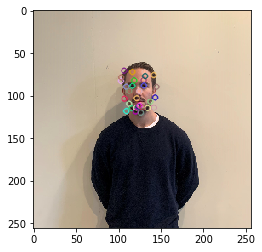

Num keypoints: 23


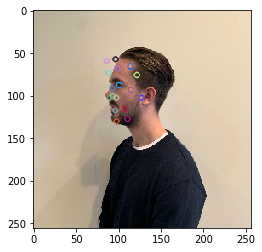

Num keypoints: 48


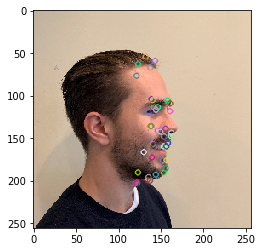

Num keypoints: 34


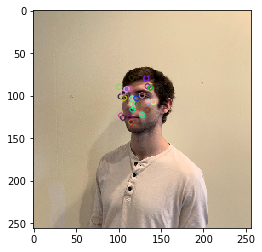

Num keypoints: 51


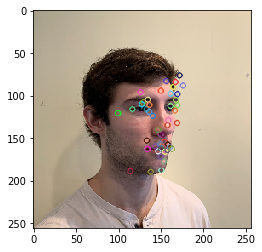

Num keypoints: 39


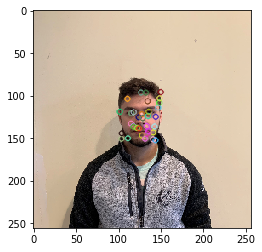

Num keypoints: 52


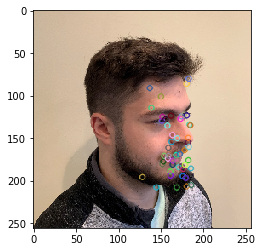

Num keypoints: 24


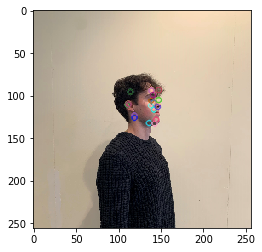

Num keypoints: 55


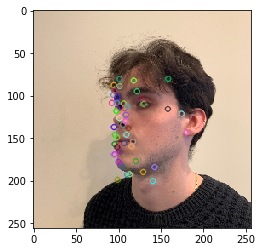

Num keypoints: 19


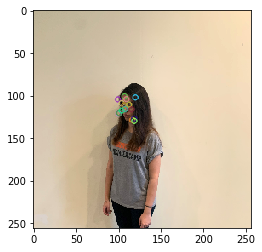

Num keypoints: 39


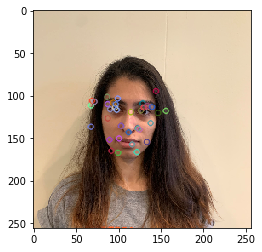

In [4]:
# Retrieve training images from destination, resize them, and store them in an array

train_images = populate_images("../Train_Images/IMG_*.jpg")
train_labels = [0, 1, 2, 3, 4]
train_keypoints, train_Y = sift(train_images, train_ROI, train_labels)


### 4.2 - Test: Face Recognition
There are a total of 70 training images (14 for each student). They are located in the "Test_Images" directory in the root folder of the project 

In [5]:
# Manually define the train images' region of interest (ROI) as rectangles
# Each rectangle is stored in a [x,y,w,h] format, where (x,y) are the coords of top left corner, and w and h are 
# the width and height respectively
bogdan_test_ROI = [[96, 111,  60,  58], [80, 112,  60,  60], [55, 110,  58,  55], [130,  100,  63,  65], [137,  105,  50,  73], [115, 70,  53,  88], [105, 70,  53,  93], [70,  76, 78,  80], [71,  80,  63,  78], [55,  80,  63,  78], [88,  82,  70,  73], [92,  82,  70,  70], [90,  80,  70,  70], [97,  81,  64,  64]]
quentin_test_ROI = [[98, 84, 46, 46], [45, 75, 50, 68], [50, 75, 50, 60], [130, 77, 60, 60], [130, 77, 50, 60], [84, 58, 51, 51],  [72, 60, 55, 58], [68, 56, 52, 58], [96, 56, 47, 60], [120, 60, 45, 64], [91, 66, 57, 57], [98, 71, 56, 62], [95, 86, 58, 58], [101, 86, 60, 62]]
sarah_test_ROI = [[113, 101, 45, 45], [119,  98,  40,  46], [120, 105,  30,  45], [97, 105,  36,  40], [91, 100,  26,  40], [109,  79,  48,  48], [120,  77,  45,  49], [122,  74,  40,  55], [95,  78, 35,  49], [93,  78, 30,  49], [101,  79,  47,  47], [105,  80,  40,  47], [85,  78,  49,  49], [113,  77,  46,  46]]
connor_test_ROI = [[110,  98,  51,  46], [90,  95,  51,  46], [85,  85,  51,  48], [120,  95,  51,  46], [140,  95,  47,  46], [120,  60,  52,  55], [110,  60,  51,  46], [94, 56, 50, 50], [110,  53,  46,  56], [107,  51,  51,  54], [106,  66,  51,  53], [108,  68,  50,  50], [104,  74,  37,  37], [106,  73,  44,  44]]
julien_test_ROI = [[130,  85,  45,  55], [128,  91,  45,  45], [115,  96,  49,  49], [110,  96,  49,  49], [103,  85,  49,  49], [110, 70, 48, 58], [109, 70, 48, 48], [93, 60, 62, 62], [93, 60, 54, 62], [100, 65, 50, 58], [94, 76, 54, 54], [95, 70, 55, 55], [111,  79,  49,  49], [98, 73, 59, 59]]

# The images are added to the test data set in the order of the images
test_ROI = []
test_ROI = np.vstack((bogdan_test_ROI, quentin_test_ROI, sarah_test_ROI, connor_test_ROI, julien_test_ROI))

print(np.array(test_ROI).shape)

(70, 4)


Num keypoints: 40


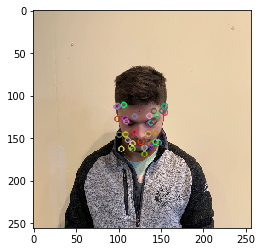

Num keypoints: 61


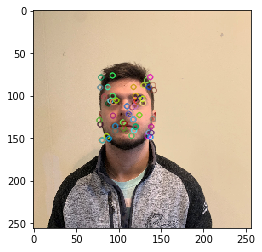

Num keypoints: 21


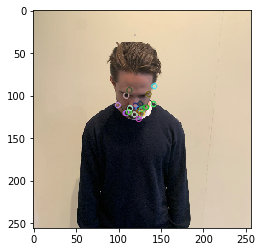

Num keypoints: 30


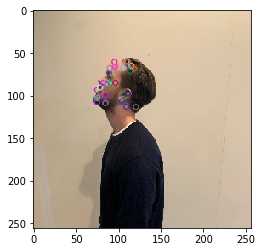

Num keypoints: 12


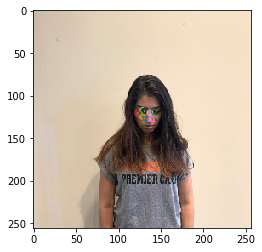

Num keypoints: 23


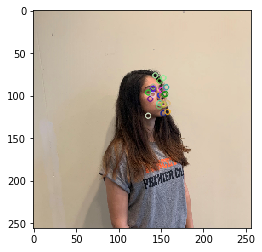

Num keypoints: 24


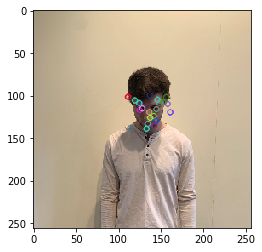

Num keypoints: 32


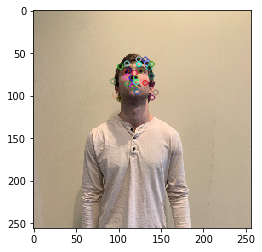

Num keypoints: 28


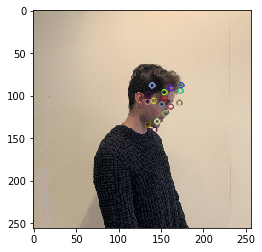

Num keypoints: 36


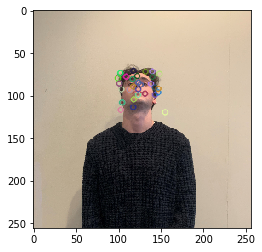

In [6]:
# Retrieve test images from destination, resize them, and store them in an array

test_images = populate_images("../Test_Images/IMG_*.jpg")
test_labels = [2, 0, 4, 1, 3]
test_keypoints, test_Y = sift(test_images, test_ROI, test_labels)

### 4.2.1 - Evaluation

In [7]:
def recognition_rate(test_Y,test_predictions):
    from sklearn.metrics import accuracy_score

    # obtain recognition rate (aka accuracy score)
    acc_score = accuracy_score(test_Y,test_predictions)*100

    # Print recognition rate
    print("Recognition Rate: " + ("%.2f" % acc_score) +"%\n")
    
    return acc_score

In [8]:
def confusion_matrix(test_Y,test_predictions):
    from sklearn.metrics import confusion_matrix

    # obtain confusion matrix
    conf_mat = confusion_matrix(test_Y,test_predictions)
    
    # normalize confusion matrix
    normalized_conf_mat = conf_mat / np.sum(conf_mat, axis=1).reshape(-1,1)

#     # Print numeric confusion matrix for exact numbers
#     print("Confusion Matrix:\n")
#     print(conf_mat, "\n")

    # Print normalized numeric confusion matrix for exact numbers (row sum = 1)
    print("Normalized Confusion Matrix:\n")
    np.set_printoptions(precision=2)
    print(normalized_conf_mat, "\n")

    # Plot colour map confusion matrix for visual representation
    plt.figure()
    plt.imshow(normalized_conf_mat)
    plt.title("Normalized Confusion Matrix Colour Plot"), plt.colorbar()
    plt.show()
    
    return normalized_conf_mat

## 4.3 - Experiments

### 4.3.0 - Setup
- Clustering using GMM
- Create BoW histograms
- Perform facial recognition on test images using nearest training histogram

In [9]:
def GMM(K_clusters, train_descriptors, test_descriptors):
    from sklearn import mixture
    
    train_data = np.float32(np.vstack(train_descriptors))
    test_data = np.float32(np.vstack(test_descriptors))
    
    # define a GMM class
    clf = mixture.GaussianMixture(n_components=K_clusters, covariance_type='tied')

    # Train model on the train data
    clf.fit(train_data)
    
    # predict cluster membership from the fitted GMM on the train andtest data
    label_train = clf.predict(train_data)
    label_test = clf.predict(test_data)
    
    # Extract the number of features per image to be used in Bag of Words
    train_feats_count = []
    test_feats_count = []
    
    for train_image in train_descriptors:
        train_feats_count.append(len(train_image))
    
    for test_image in test_descriptors:
        test_feats_count.append(len(test_image))
    
    return label_train, label_test, train_feats_count, test_feats_count

In [10]:
def BoW(predicted_labels,K_words,num_test_feats):
    
    # counter to ensure we parse through all features in all images
    counter = 0
    histograms = []
    
    # for each image in the image dataset, we want to create a histogram representing the bag of words
    for image in range(len(num_test_feats)):
        
        # create an empty array to represent the vocabulary; the size should be the number of words; this will be our hist
        histogram_array = np.zeros(K_words)
        
        # loop through each feature in a given image
        for feature in range(num_test_feats[image]):
            
            # determine the word the feature belongs to (using counter as the index here because counter iterate through the array containing all features from all images)
            word_index = predicted_labels[counter]
            
            # increase the frequency count of that word in the image
            histogram_array[word_index] += 1
            
            # increment counter
            counter += 1
            
        histograms.append(histogram_array)
    
    # normalize all histograms by dividing each word's frequency by the sum of frequencies for that image
    # makes all the word frequencies for a given image sum to 1
    histograms = histograms / np.sum(histograms, axis=1).reshape(-1,1)
    
    # Display first 3 histograms
    for i in range(3):
        clusters = np.arange(K_words)
        norm_frequencies = histograms[i]

        plt.bar(clusters, norm_frequencies, align='center', alpha=0.5)
        plt.xticks(clusters)
        plt.xlabel('Words')
        plt.ylabel('Normalized Frequency')
        plt.title('Bag of Words Histogram - Image #' + str(i+1))

        plt.show()
    
    
    return histograms

In [11]:
def nearestneighbour(test_hist,array_of_hists):
    
    distances = []
    
    # for each test image, find the Euclidean distance between its histogram and each training image histograms
    for hist in range(len(array_of_hists)):
        distance = np.linalg.norm(test_hist - array_of_hists[hist])
        distances.append(distance)
    
    # get index (image number) of the training histogram that was the nearest
    image_number = np.argmin(distances)
    return image_number

In [12]:
def assignidentity(hists_train,hists_test,train_Y,test_Y):
    
    test_nearest_neighbours = []

    # find nearest training image histogram for each test image histogram (in featurespace)
    for image in range(len(hists_test)):
        nearest_neighbour = nearestneighbour(hists_test[image],hists_train)
        test_nearest_neighbours.append(nearest_neighbour)
    

    test_predictions = []

    # for each test image, assign the face identity associated to the training image whose histogram was the nearest
    for image in range(len(test_nearest_neighbours)):
        pic = test_nearest_neighbours[image]
        person = train_Y[pic]
        test_predictions.append(person)
    
    return test_predictions

### 4.3.1 - HoG vs LBP
- Extract patches for SIFT keypoints
- Extract HoG descriptor for each patch, comparing three different cell sizes
- Extract LBP descriptor for each patch, comparing three different radius sizes
- Comparison and discussion done in section 2.3.1

In [13]:
def extract_keypoint_patches(images, all_keypoints, patch_size):
    
    patched_images = []
    for image_keypoints in all_keypoints:
        # Get an integer value for each of the keypoints in an image
        # SIFT returns floating point number coordinates for keypoints
        # Hence, to get a specific pixel as a keypoint, we floor the value
        # This method brings in the possibility that two distinct keypoints are mapped to the same pixel, and thus
        # we only take unique pixels.
        keypoints = np.unique(np.floor([keypoint.pt for keypoint in image_keypoints]).astype(int), axis=0)
        
        # Break down the image into patches based on the keypoints found in SIFT
        # To put it simple, this converts each image to a list of patches centered at each keypoint
        patches = [ images[all_keypoints.index(image_keypoints)] [kp[1]-(patch_size//2):kp[1]+(patch_size//2+1), kp[1]-(patch_size//2):kp[1]+(patch_size//2)+1] for kp in keypoints]
        
        # Convert the patches to grayscale
        grayscale_patches = [ cv2.cvtColor(patch, cv2.COLOR_RGB2GRAY) for patch in patches]
        
        # Append image points
        patched_images.append(grayscale_patches)
    
    return patched_images

In [30]:
# Extract patches for test and train keypoints
train_patches_per_images = extract_keypoint_patches(train_images, train_keypoints, 15)
test_patches_per_images = extract_keypoint_patches(test_images, test_keypoints, 15)

print(np.array(train_patches_per_images[0]).shape)
print(np.array(test_patches_per_images[0]).shape)

(30, 15, 15)
(36, 15, 15)


In [31]:
# # Hyper-parameter tuning for the GMM using HoG

# K= np.arange(1,100,10)


# for k in K:
#     print("-------------- K = {} ----------------".format(k))
#     recog_rate = []
#     for i in range(10):
#         hog_gmm_train_labels, hog_gmm_test_labels, hog_num_train_feats, hog_num_test_feats = GMM(k, hog_feats_train, hog_feats_test)
        
#         # using the predicted words to create BoW histograms for the training images
#         print("----------------Bag of Words - Training Histograms----------------")
#         hog_hists_train = BoW(hog_gmm_train_labels, k, hog_num_train_feats)

#         # using the predicted words to create BoW histograms for the testing images
#         print("----------------Bag of Words - Testing Histograms----------------")
#         hog_hists_test = BoW(hog_gmm_test_labels, k, hog_num_test_feats)
        
#         # get predictions; i.e. predict the identity of the person in each test image
#         # where: 0:quentin, 1:connor, 2:bogdan, 3:julien, 4:sarah
#         test_predictions = assignidentity(hog_hists_train,hog_hists_test,train_Y,test_Y)
        
#         # obtain recognition rate and confusion matrix
#         recog_rate.append(recognition_rate(test_Y,test_predictions))
#         confusion_matrix(test_Y,test_predictions)
#     print("Overall Recognition Rate: {}".format(np.average(recog_rate)))

### 4.3.1.1 HoG Descriptor 

In [39]:
def hog_features(images, img_size, cell_size = (8,8), block_size = (2,2), nbins = 9):
    # create HoG Object
    # winSize is the size of the image cropped to multiple of the cell size
    # all arguments should be given in terms of number of pixels
    hog = cv2.HOGDescriptor(_winSize=(img_size[1] // cell_size[1] * cell_size[1],
                                      img_size[0] // cell_size[0] * cell_size[0]),
                            _blockSize=(block_size[1] * cell_size[1],
                                        block_size[0] * cell_size[0]),
                            _blockStride=(cell_size[1], cell_size[0]),
                            _cellSize=(cell_size[1], cell_size[0]),
                            _nbins=nbins)

    n_cells = (img_size[0] // cell_size[0], img_size[1] // cell_size[1])

    total_hogs = []
    # Compute HoG features
    for img in images:
        hog_feats = []
        for patch in img:
            hogger = np.array(hog.compute(patch)) \
                             .reshape(n_cells[1] - block_size[1] + 1,
                                      n_cells[0] - block_size[0] + 1,
                                      block_size[1], block_size[0], nbins) \
                             .transpose((1, 0, 3, 2, 4))
            hog_feats.append(hogger.flatten())
        total_hogs.append(hog_feats)
    return total_hogs

GMM with HoG and cell size of (3, 3)
----------------Bag of Words - Training Histograms----------------


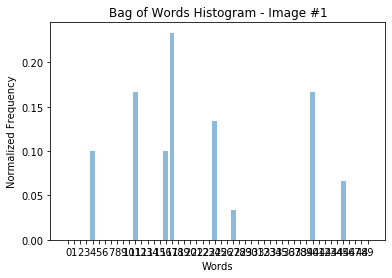

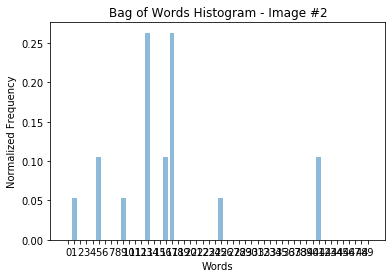

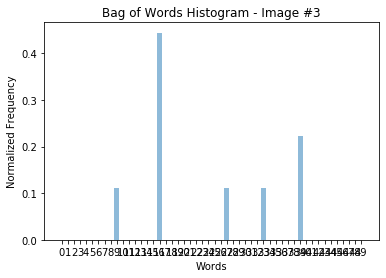

----------------Bag of Words - Testing Histograms----------------


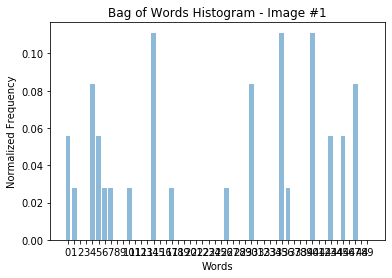

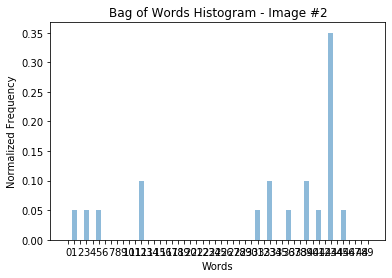

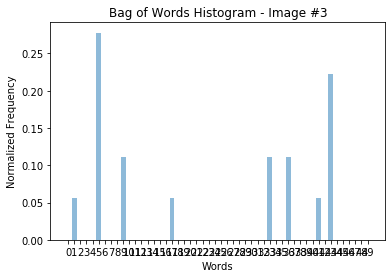

Recognition Rate: 20.00%

Normalized Confusion Matrix:

[[0.36 0.14 0.   0.5  0.  ]
 [0.43 0.   0.   0.57 0.  ]
 [0.14 0.21 0.07 0.36 0.21]
 [0.43 0.   0.   0.5  0.07]
 [0.29 0.   0.14 0.5  0.07]] 



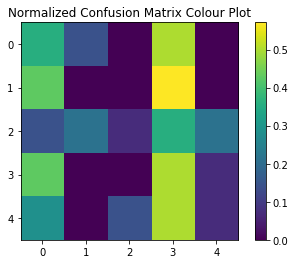

GMM with HoG and cell size of (4, 4)
----------------Bag of Words - Training Histograms----------------


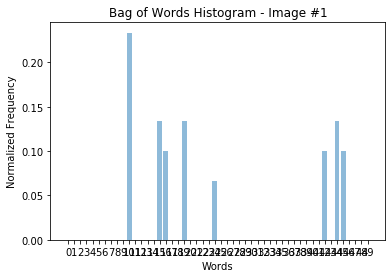

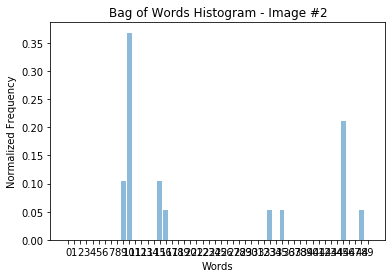

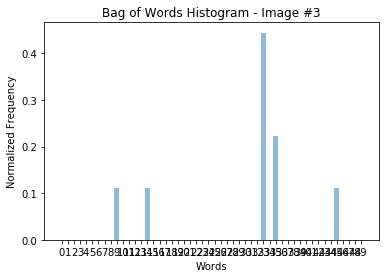

----------------Bag of Words - Testing Histograms----------------


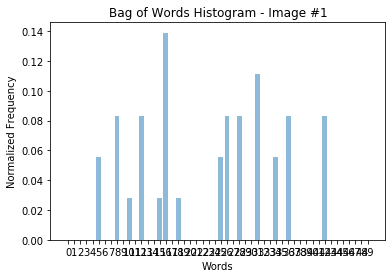

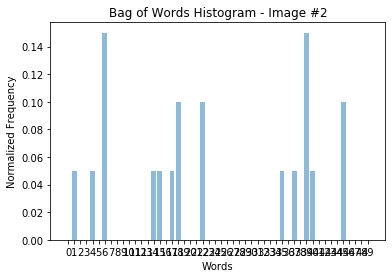

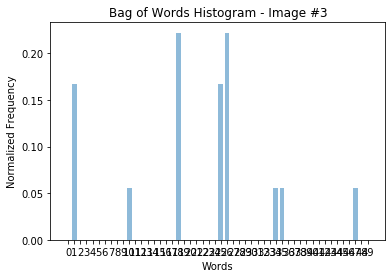

Recognition Rate: 28.57%

Normalized Confusion Matrix:

[[0.36 0.29 0.14 0.21 0.  ]
 [0.07 0.07 0.29 0.57 0.  ]
 [0.   0.5  0.21 0.29 0.  ]
 [0.14 0.07 0.07 0.64 0.07]
 [0.29 0.21 0.21 0.14 0.14]] 



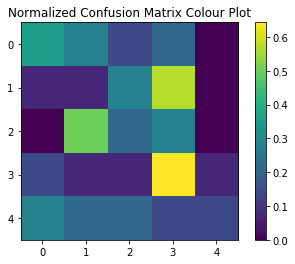

GMM with HoG and cell size of (5, 5)
----------------Bag of Words - Training Histograms----------------


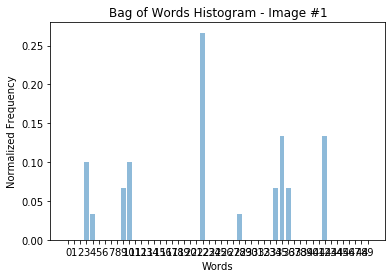

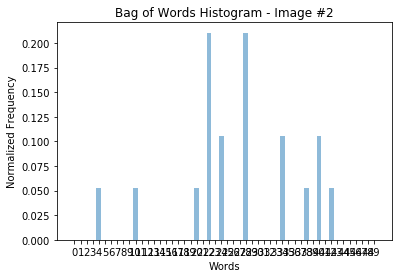

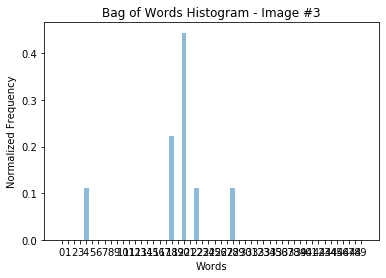

----------------Bag of Words - Testing Histograms----------------


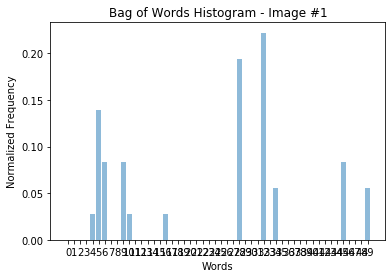

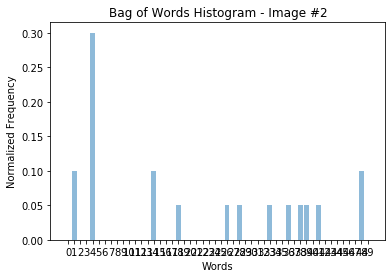

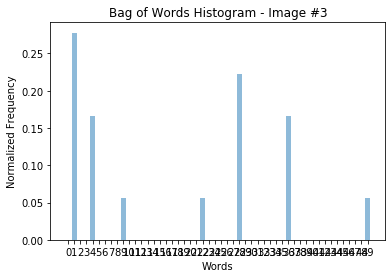

Recognition Rate: 28.57%

Normalized Confusion Matrix:

[[0.14 0.29 0.07 0.5  0.  ]
 [0.07 0.07 0.   0.86 0.  ]
 [0.14 0.36 0.29 0.14 0.07]
 [0.36 0.   0.   0.64 0.  ]
 [0.14 0.07 0.07 0.43 0.29]] 



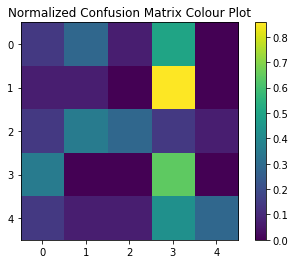

In [43]:
# Extract HoG descriptor for each patch, comparing three different cell sizes


K = 50
cell_sizes = [(3,3), (4,4), (5,5)]

for cs in cell_sizes:
    print("GMM with HoG and cell size of {}".format(cs))
    hog_feats_train = hog_features(train_patches_per_images, (15,15), cell_size= cs, block_size=(2,2), nbins=9)
    hog_feats_test = hog_features(test_patches_per_images, (15,15), cell_size=cs, block_size=(2,2), nbins=9)
    
    hog_gmm_train_labels, hog_gmm_test_labels, hog_num_train_feats, hog_num_test_feats = GMM(K, hog_feats_train, hog_feats_test)

    # using the predicted words to create BoW histograms for the training images
    print("----------------Bag of Words - Training Histograms----------------")
    hog_hists_train = BoW(hog_gmm_train_labels, K, hog_num_train_feats)

    # using the predicted words to create BoW histograms for the testing images
    print("----------------Bag of Words - Testing Histograms----------------")
    hog_hists_test = BoW(hog_gmm_test_labels, K, hog_num_test_feats)
        
    # get predictions; i.e. predict the identity of the person in each test image
    # where: 0:quentin, 1:connor, 2:bogdan, 3:julien, 4:sarah
    test_predictions = assignidentity(hog_hists_train,hog_hists_test,train_Y,test_Y)
        
    # obtain recognition rate and confusion matrix
    recognition_rate(test_Y,test_predictions)
    confusion_matrix(test_Y,test_predictions)
    

### 4.3.1.2 LBP Descriptor

In [20]:
def lbp(images, n_points, radius, method='uniform'):
    from skimage.feature import local_binary_pattern
    from skimage import data
    
    all_lbp = []
    for img in images:
        lbp_feats = []
        for patch in img:
            lbp = local_binary_pattern(patch, n_points, radius, 'uniform')
            lbp_feats.append(lbp.flatten())
            
        all_lbp.append(lbp_feats)
    return all_lbp


GMM with LBP and radius size of 2
----------------Bag of Words - Training Histograms----------------


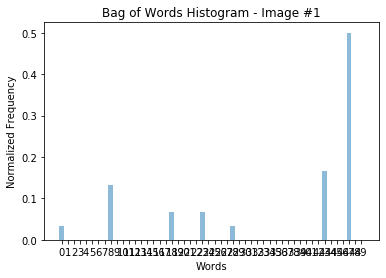

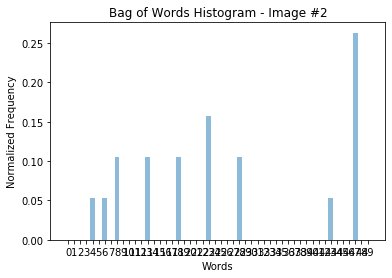

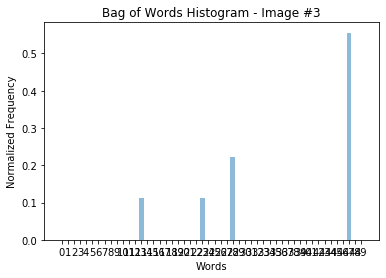

----------------Bag of Words - Testing Histograms----------------


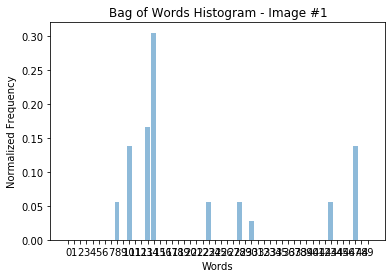

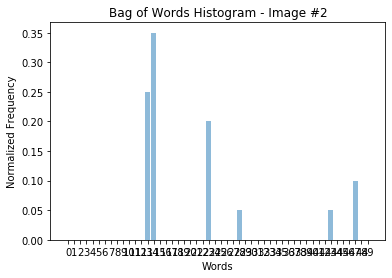

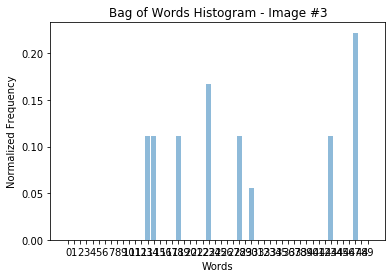

Recognition Rate: 22.86%

Normalized Confusion Matrix:

[[0.07 0.29 0.07 0.5  0.07]
 [0.07 0.07 0.07 0.71 0.07]
 [0.14 0.36 0.21 0.29 0.  ]
 [0.29 0.   0.   0.5  0.21]
 [0.07 0.14 0.14 0.36 0.29]] 



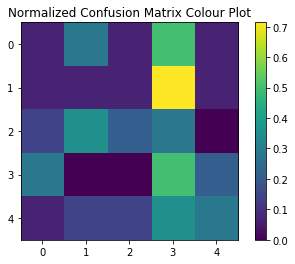

GMM with LBP and radius size of 7
----------------Bag of Words - Training Histograms----------------


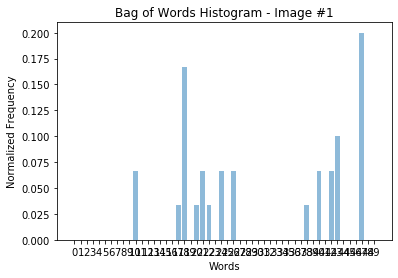

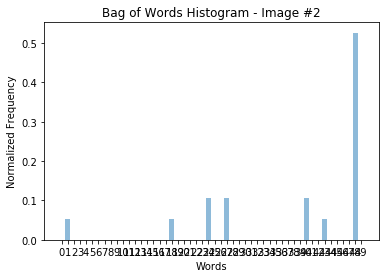

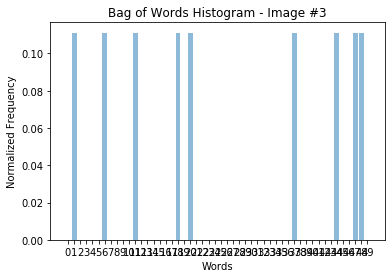

----------------Bag of Words - Testing Histograms----------------


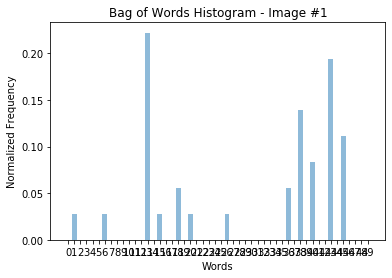

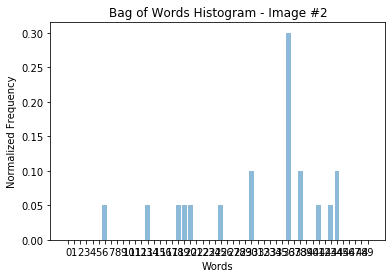

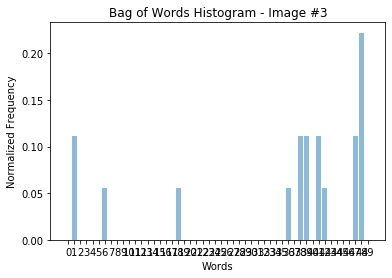

Recognition Rate: 21.43%

Normalized Confusion Matrix:

[[0.21 0.29 0.07 0.36 0.07]
 [0.07 0.07 0.07 0.64 0.14]
 [0.07 0.21 0.29 0.29 0.14]
 [0.14 0.29 0.   0.36 0.21]
 [0.07 0.07 0.29 0.43 0.14]] 



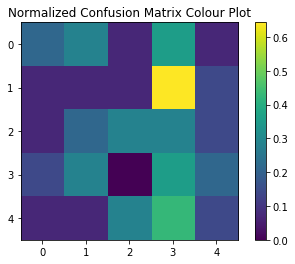

GMM with LBP and radius size of 12
----------------Bag of Words - Training Histograms----------------


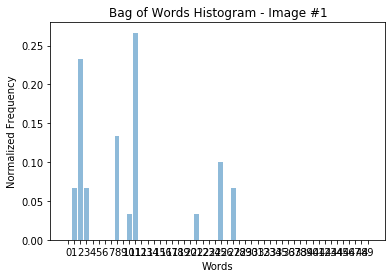

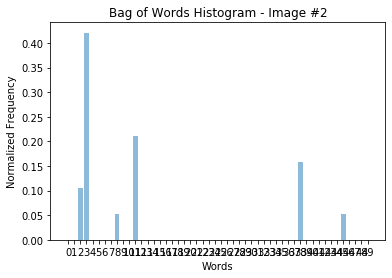

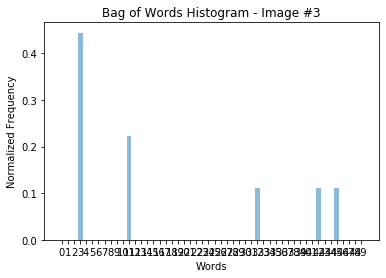

----------------Bag of Words - Testing Histograms----------------


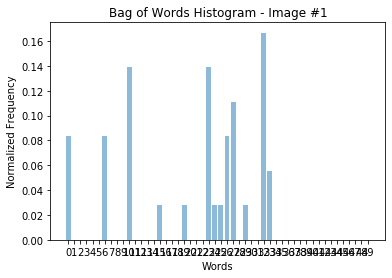

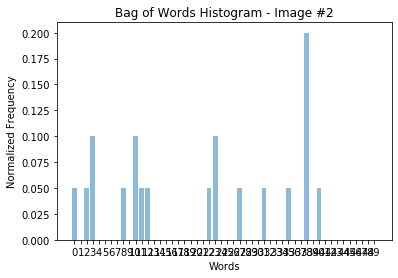

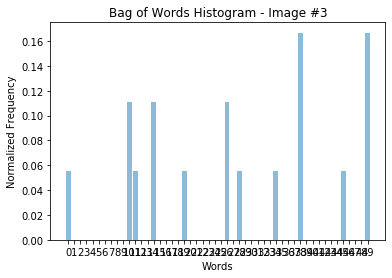

Recognition Rate: 24.29%

Normalized Confusion Matrix:

[[0.36 0.21 0.   0.36 0.07]
 [0.57 0.07 0.07 0.29 0.  ]
 [0.21 0.36 0.07 0.29 0.07]
 [0.29 0.21 0.14 0.21 0.14]
 [0.21 0.   0.   0.29 0.5 ]] 



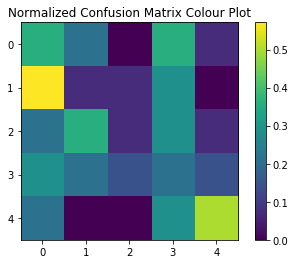

In [48]:
# Hyper-parameter settings for LBP
radius = [2, 7, 12]
n_points = list(map(lambda x: x * 8, radius))
K = 50


for i in range(len(radius)):
    print("GMM with LBP and radius size of {}".format(radius[i]))
    
    lbp_feats_train = lbp(train_patches_per_images,n_points=n_points[i], radius=radius[i])
    lbp_feats_test = lbp(test_patches_per_images,n_points=n_points[i], radius=radius[i])
    
    
    lbp_gmm_train_labels, lbp_gmm_test_labels, lbp_num_train_feats, lbp_num_test_feats = GMM(K, lbp_feats_train, lbp_feats_test)
    
    # using the predicted words to create BoW histograms for the training images
    print("----------------Bag of Words - Training Histograms----------------")
    lbp_hists_train = BoW(lbp_gmm_train_labels, K, lbp_num_train_feats)

    # using the predicted words to create BoW histograms for the testing images
    print("----------------Bag of Words - Testing Histograms----------------")
    lbp_hists_test = BoW(lbp_gmm_test_labels, K, lbp_num_test_feats)

    # get predictions; i.e. predict the identity of the person in each test image
    # where: 0:quentin, 1:connor, 2:bogdan, 3:julien, 4:sarah
    test_predictions = assignidentity(lbp_hists_train,lbp_hists_test,train_Y,test_Y)

    # obtain recognition rate and confusion matrix
    recognition_rate(test_Y,test_predictions)
    confusion_matrix(test_Y,test_predictions)

### 4.2 - HoG with Different Patch Sizes

GMM with HoG and patch size of 8
----------------Bag of Words - Training Histograms----------------


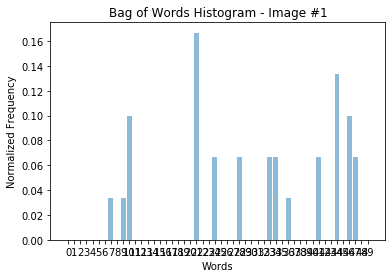

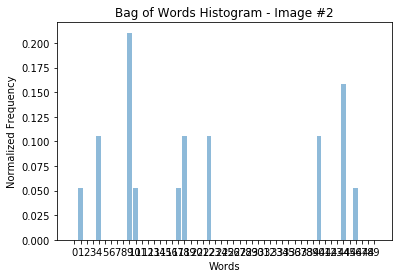

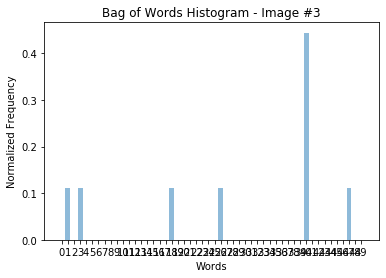

----------------Bag of Words - Testing Histograms----------------


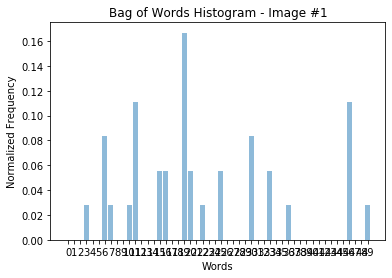

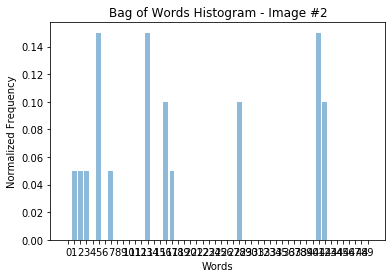

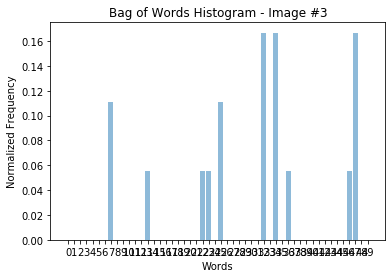

Recognition Rate: 21.43%

Normalized Confusion Matrix:

[[0.36 0.21 0.07 0.29 0.07]
 [0.29 0.07 0.29 0.29 0.07]
 [0.   0.71 0.07 0.14 0.07]
 [0.36 0.14 0.07 0.43 0.  ]
 [0.07 0.21 0.14 0.43 0.14]] 



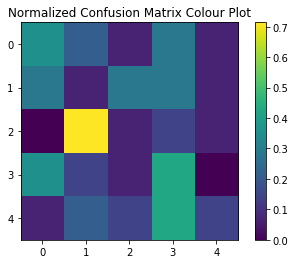

GMM with HoG and patch size of 15
----------------Bag of Words - Training Histograms----------------


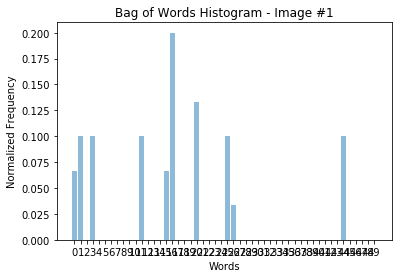

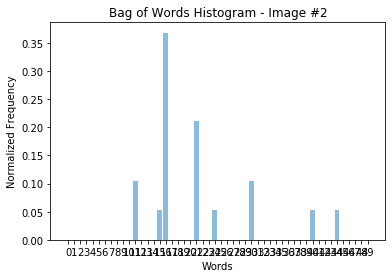

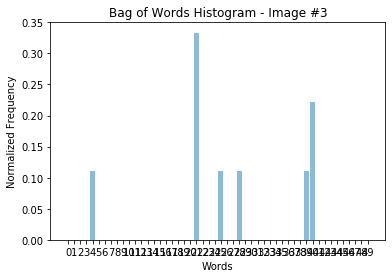

----------------Bag of Words - Testing Histograms----------------


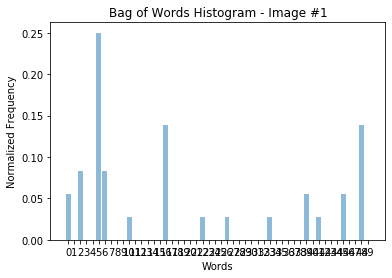

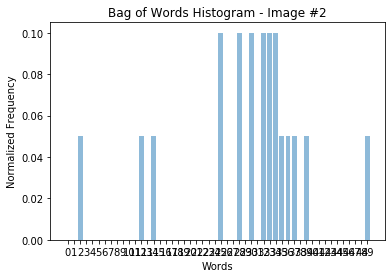

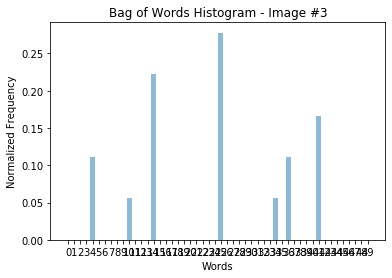

Recognition Rate: 30.00%

Normalized Confusion Matrix:

[[0.36 0.29 0.14 0.21 0.  ]
 [0.21 0.07 0.29 0.43 0.  ]
 [0.07 0.36 0.21 0.21 0.14]
 [0.29 0.07 0.   0.57 0.07]
 [0.14 0.14 0.21 0.21 0.29]] 



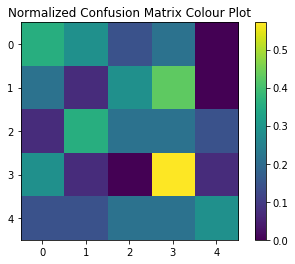

GMM with HoG and patch size of 25
----------------Bag of Words - Training Histograms----------------


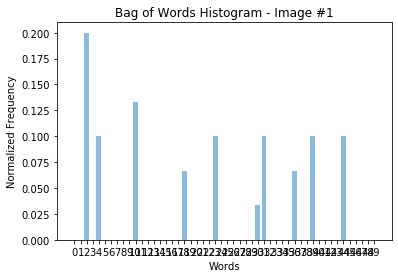

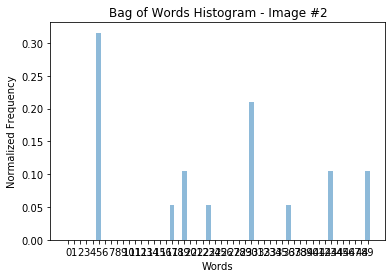

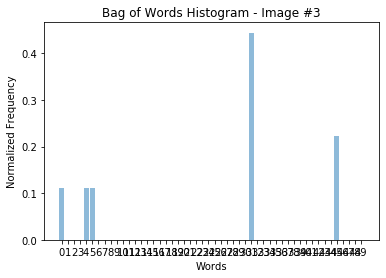

----------------Bag of Words - Testing Histograms----------------


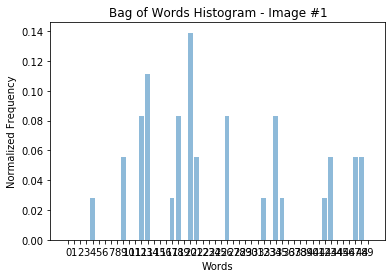

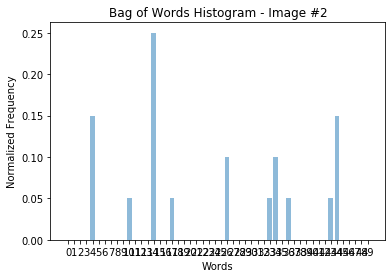

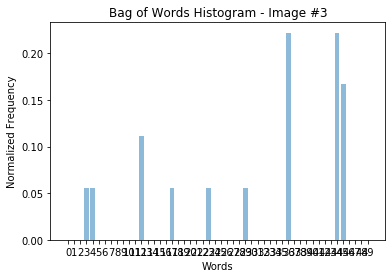

Recognition Rate: 18.57%

Normalized Confusion Matrix:

[[0.29 0.29 0.14 0.21 0.07]
 [0.43 0.21 0.07 0.29 0.  ]
 [0.21 0.43 0.07 0.21 0.07]
 [0.57 0.14 0.07 0.21 0.  ]
 [0.29 0.21 0.07 0.29 0.14]] 



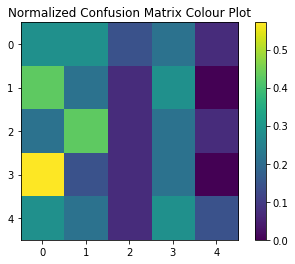

In [52]:
K = 50
patch_sizes = [8, 15 ,25] # Patch sizes lower than 8 return an empty HoG

for ps in patch_sizes:
    print("GMM with HoG and patch size of {}".format(ps))
    train_patches_per_images = extract_keypoint_patches(train_images, train_keypoints, ps)
    test_patches_per_images = extract_keypoint_patches(test_images, test_keypoints, ps)

    hog_feats_train = hog_features(train_patches_per_images, (ps, ps), cell_size= (4,4), block_size=(2,2), nbins=9)
    hog_feats_test = hog_features(test_patches_per_images, (ps, ps), cell_size=(4,4), block_size=(2,2), nbins=9)

    hog_gmm_train_labels, hog_gmm_test_labels, hog_num_train_feats, hog_num_test_feats = GMM(K, hog_feats_train, hog_feats_test)
        
    # using the predicted words to create BoW histograms for the training images
    print("----------------Bag of Words - Training Histograms----------------")
    hog_hists_train = BoW(hog_gmm_train_labels, K, hog_num_train_feats)

    # using the predicted words to create BoW histograms for the testing images
    print("----------------Bag of Words - Testing Histograms----------------")
    hog_hists_test = BoW(hog_gmm_test_labels, K, hog_num_test_feats)
        
    # get predictions; i.e. predict the identity of the person in each test image
    # where: 0:quentin, 1:connor, 2:bogdan, 3:julien, 4:sarah
    test_predictions = assignidentity(hog_hists_train,hog_hists_test,train_Y,test_Y)
        
    # obtain recognition rate and confusion matrix
    recognition_rate(test_Y,test_predictions)
    confusion_matrix(test_Y,test_predictions)
    

### 4.3 - SIFT vs Harris

In [54]:
def get_harris_points(images, rectangles):
    feature_params = dict( maxCorners = 500,
                       qualityLevel = 0.03,
                       minDistance = 7,
                       blockSize = 7,
                       useHarrisDetector = True)
    points = []
    for i in range(len(images)):
        [x,y,w,h] = rectangles[i]
        mask = np.zeros(images[i].shape[:2], dtype=np.uint8)
        
        cv2.rectangle(mask, (x,y), ((x+w),(y+h)), (255), thickness = -1)
        feature_params['mask'] = mask
        p1 = cv2.goodFeaturesToTrack(cv2.cvtColor(images[i], cv2.COLOR_RGB2GRAY), **feature_params)
        points.append(np.vstack(p1))
        
    return points

In [55]:
harris_train_points = get_harris_points(train_images, train_ROI)
harris_test_points = get_harris_points(test_images, test_ROI)

In [56]:
def extract_harris_patches(images, all_keypoints, patch_size):
    
    patched_images = []
    for i in range(len(all_keypoints)):

        keypoints = np.unique(np.floor([keypoint for keypoint in all_keypoints[i]]).astype(int), axis=0)
        
        patches = [ images[i] [kp[1]-(patch_size//2):kp[1]+(patch_size//2+1), kp[1]-(patch_size//2):kp[1]+(patch_size//2)+1] for kp in keypoints]
        
        # Convert the patches to grayscale
        grayscale_patches = [ cv2.cvtColor(patch, cv2.COLOR_RGB2GRAY) for patch in patches]
        
        # Append image points
        patched_images.append(grayscale_patches)
    
    return patched_images

GMM with HoG with cell size of (4, 4) and Harris patch size of 15
----------------Bag of Words - Training Histograms----------------


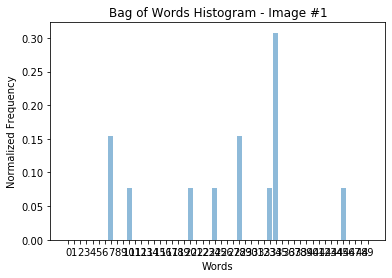

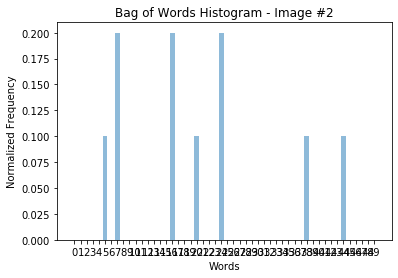

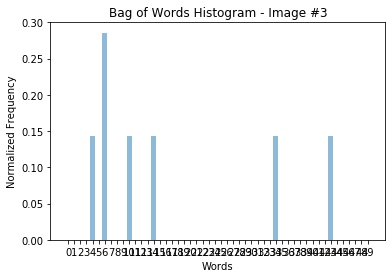

----------------Bag of Words - Testing Histograms----------------


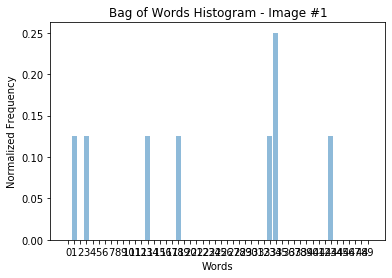

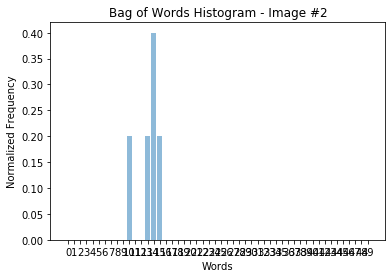

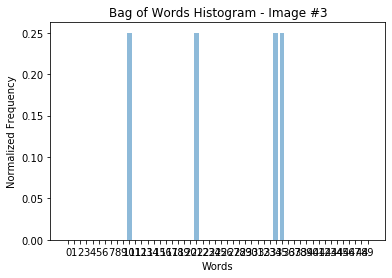

Recognition Rate: 25.71%

Normalized Confusion Matrix:

[[0.43 0.21 0.07 0.29 0.  ]
 [0.57 0.21 0.07 0.07 0.07]
 [0.14 0.21 0.21 0.36 0.07]
 [0.43 0.14 0.14 0.29 0.  ]
 [0.14 0.36 0.07 0.29 0.14]] 



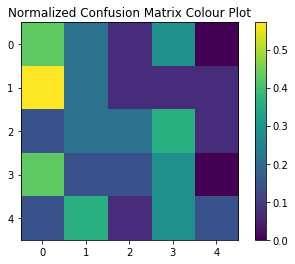

In [58]:
patch_size = 15
cell_size = (4,4)
K = 50

### run patches through hog or lbp at best cell_size
print("GMM with HoG with cell size of {} and Harris patch size of {}".format(cell_size, patch_size))
train_images_harris_patches = extract_harris_patches(train_images, harris_train_points, patch_size)
test_images_harris_patches = extract_harris_patches(test_images, harris_test_points, patch_size)

hog_feats_train = hog_features(train_images_harris_patches, (patch_size, patch_size), cell_size=cell_size, block_size=(2,2), nbins=9)
hog_feats_test = hog_features(test_images_harris_patches, (patch_size, patch_size), cell_size=cell_size, block_size=(2,2), nbins=9)

hog_gmm_train_labels, hog_gmm_test_labels, hog_num_train_feats, hog_num_test_feats = GMM(K, hog_feats_train, hog_feats_test)
        
# using the predicted words to create BoW histograms for the training images
print("----------------Bag of Words - Training Histograms----------------")
hog_hists_train = BoW(hog_gmm_train_labels, K, hog_num_train_feats)

# using the predicted words to create BoW histograms for the testing images
print("----------------Bag of Words - Testing Histograms----------------")
hog_hists_test = BoW(hog_gmm_test_labels, K, hog_num_test_feats)
        
# get predictions; i.e. predict the identity of the person in each test image
# where: 0:quentin, 1:connor, 2:bogdan, 3:julien, 4:sarah
test_predictions = assignidentity(hog_hists_train,hog_hists_test,train_Y,test_Y)
        
# obtain recognition rate and confusion matrix
recognition_rate(test_Y,test_predictions)
conf_mat = confusion_matrix(test_Y,test_predictions)